*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


In [58]:
import nltk
nltk.download('punkt')
nltk.download("punkt_tab")
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())

import pickle

with open("word2vec_embeddings.pkl", "rb") as f:
    torch_model = pickle.load(f)

from gensim.models import Word2Vec
gensim_trained_model = Word2Vec.load("word2vec_text8_gensim.model").wv

from gensim.models import KeyedVectors
pretrained_w2v = KeyedVectors.load("word2vec-google-news-300.model")

from gensim.models import KeyedVectors
pretrained_fasttext = KeyedVectors.load("fasttext-wiki-news-subwords-300.model")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [59]:
def sentence_embedding(sentence, model):
    tokens = tokenize_text(sentence)
    vecs = [model[w] for w in tokens if w in model]
    if len(vecs) == 0:
        return np.zeros(len(next(iter(model.values()))))
    return np.mean(vecs, axis = 0)

In [60]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

In [61]:
def run_sentence_similarity(model, model_name):
    q = sentence_embedding(query, model)
    sims = []
    for s in sentences:
        v = sentence_embedding(s, model)
        sims.append((cosine_similarity([q], [v])[0,0], s))
    sims.sort(reverse=True, key=lambda x: x[0])

    print(f"\n{model_name}")
    for score, s in sims:
        print(f"{score:.3f} | {s}")

run_sentence_similarity(torch_model, "PyTorch Skip-Gram (100D)")
run_sentence_similarity(gensim_trained_model, "Gensim Word2Vec")
run_sentence_similarity(pretrained_w2v, "Pretrained Word2Vec")
run_sentence_similarity(pretrained_fasttext, "Pretrained FastText")


PyTorch Skip-Gram (100D)
0.000 | The cat sat on the mat.
0.000 | A dog is playing in the yard.
0.000 | I need to buy groceries today.
0.000 | The feline was resting on the rug.
0.000 | Canines enjoy outdoor activities.
0.000 | My shopping list includes milk and bread.
0.000 | The weather is beautiful today.
0.000 | Programming requires logical thinking.

Gensim Word2Vec
0.681 | The cat sat on the mat.
0.590 | A dog is playing in the yard.
0.498 | The weather is beautiful today.
0.493 | The feline was resting on the rug.
0.473 | My shopping list includes milk and bread.
0.190 | I need to buy groceries today.
0.091 | Canines enjoy outdoor activities.
0.076 | Programming requires logical thinking.

Pretrained Word2Vec
0.779 | The feline was resting on the rug.
0.737 | The cat sat on the mat.
0.648 | A dog is playing in the yard.
0.497 | My shopping list includes milk and bread.
0.431 | The weather is beautiful today.
0.428 | Canines enjoy outdoor activities.
0.372 | I need to buy groceri

In [62]:
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

In [63]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

In [64]:
def plot_tsne_umap(model, title, animals, foods):
    words = animals + foods

    def has_word(m, w):
        if isinstance(m, dict) and "word2idx" in m:
            return w in m["word2idx"]
        return w in m

    def get_vec(m, w):
        if isinstance(m, dict) and "word2idx" in m:
            idx = m["word2idx"][w]
            return np.asarray(m["embeddings"][idx])
        return np.asarray(m[w])

    word_list = [w for w in words if has_word(model,w)]

    vecs_2d = np.stack([get_vec(model,w) for w in word_list])
    colors = ["tab:blue" if w in animals else "tab:orange" for w in word_list]

    tsne = TSNE(n_components= 2, random_state= 42, perplexity= 10, init="pca", learning_rate="auto")
    vecs_2d_tsne = tsne.fit_transform(vecs_2d)

    Umap = umap.UMAP(n_components= 2, random_state=42)
    vecs_2d_umap = Umap.fit_transform(vecs_2d)

    fig, ax = plt.subplots(1,2,figsize = (12,5))

    ax[0].scatter(vecs_2d_tsne[:, 0], vecs_2d_tsne[:, 1], c=colors)
    ax[0].set_title(f"t-SNE: {title}")

    ax[1].scatter(vecs_2d_umap[:, 0], vecs_2d_umap[:, 1], c=colors)
    ax[1].set_title(f"UMAP: {title}")

    for i, w in enumerate(word_list):
        ax[0].annotate(w, (vecs_2d_tsne[i, 0], vecs_2d_tsne[i, 1]), fontsize=8)
        ax[1].annotate(w, (vecs_2d_umap[i, 0], vecs_2d_umap[i, 1]), fontsize=8)

    plt.tight_layout()
    plt.show()


c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


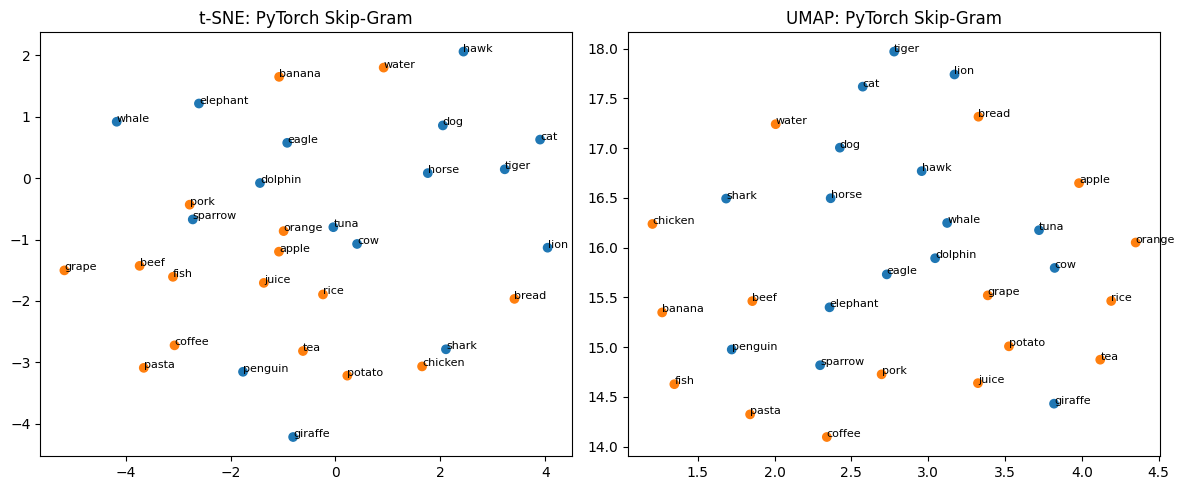

c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


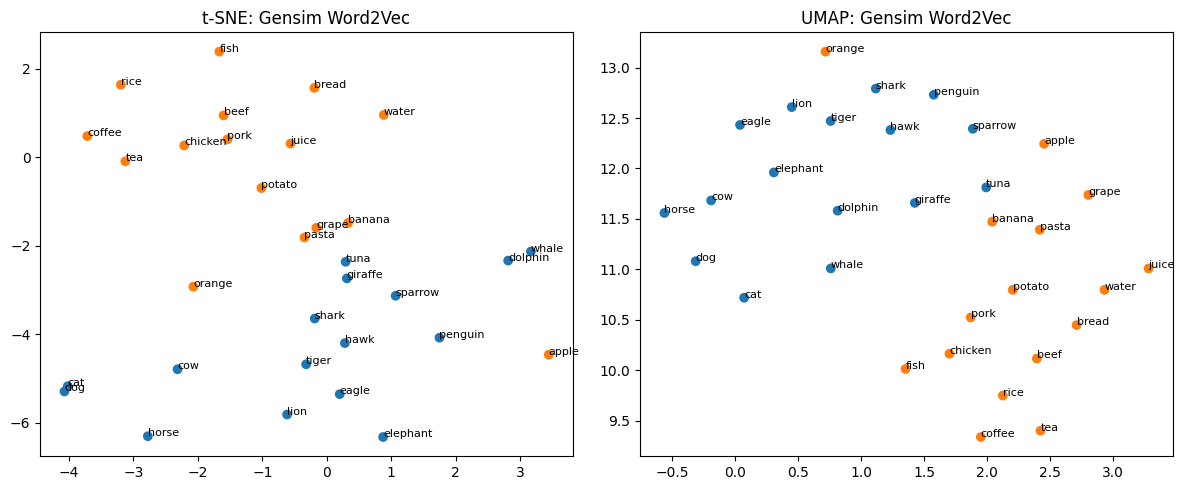

c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


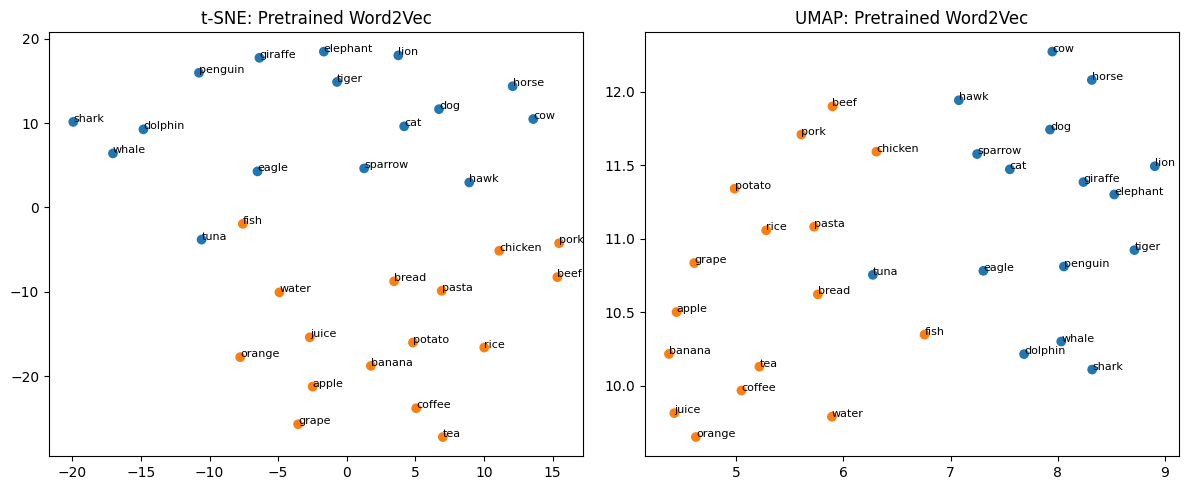

c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\Desktop\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


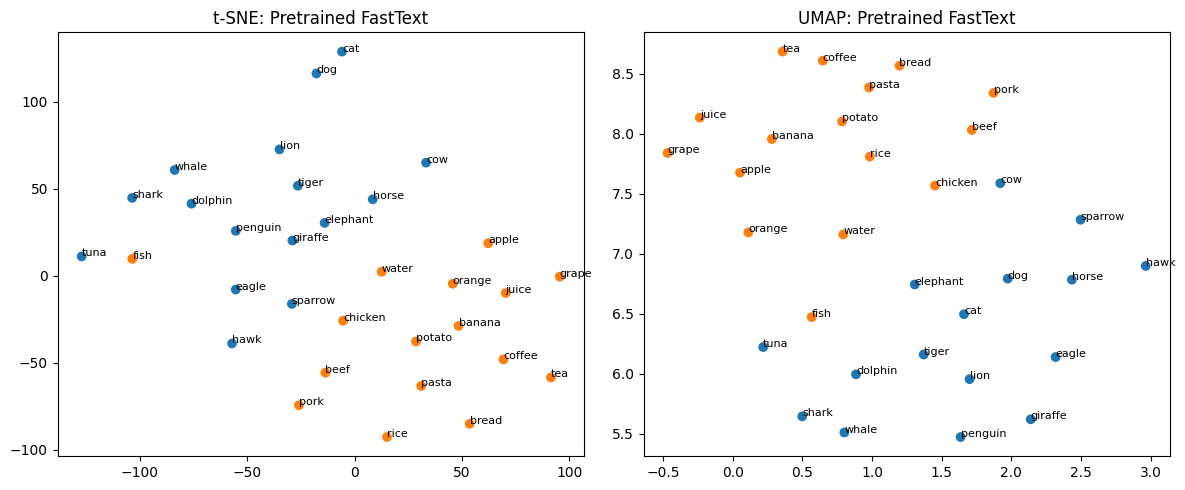

In [65]:
plot_tsne_umap(torch_model, "PyTorch Skip-Gram", animals, foods)
plot_tsne_umap(gensim_trained_model, "Gensim Word2Vec", animals, foods)
plot_tsne_umap(pretrained_w2v, "Pretrained Word2Vec", animals, foods)
plot_tsne_umap(pretrained_fasttext, "Pretrained FastText", animals, foods)

Which embeddings performed best at capturing sentence meaning?
Were the pretrained embeddings significantly better than your own? Why or why not?
What factors might explain the differences in performance?


<font color="red"> Pretrained Word2Vec and Pretrained FastText perform the best at capturing sentence meaning as the animals and foods are clearly separated.
<font color="red"> Yes, the pretrained embeddings were much better than pytorch skipgram and gensim word2vec. Though the pytorch and gensim trained embeddings can capture some word similarities, they both are trained based on small corpora, so the points are mixed in plots. However, the pretrained embeddings are based on large pretrained corpora, so they can capture the semantic distinctions better. 

<font color="red"> Training data size: the pretrained emeddings are trained on large corpora, whereas the pytorch and gensim are trained on much smaller datasets. Also large dataset have very high dimensionality, which can help capture more semantic meanings and relationships.


## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">I used ChatGPT5.2 and copilot to help me in (1). understanding the model implementations (2). suggesting code for tsne and umap plots (3). debugging the pytorch embeddings</font>
